<a href="https://colab.research.google.com/github/jnsbrdbr/NLP/blob/master/Topic_modeling(nmf_lda).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("/content/drive/MyDrive/News-Topic-Modeling.csv")

data

,title,pubDate,guid,link,description
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as..."
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...
...,...,...,...,...,...
27431,"St Mirren 0-3 Celtic: Maeda, O'Riley & Taylor ...","Tue, 02 Jan 2024 19:19:18 GMT",https://www.bbc.co.uk/sport/football/67821042,https://www.bbc.co.uk/sport/football/67821042?...,Celtic score twice in the opening six minutes ...
27432,Jadon Sancho: Manchester United winger might r...,"Tue, 02 Jan 2024 18:20:34 GMT",https://www.bbc.co.uk/sport/football/67866001,https://www.bbc.co.uk/sport/football/67866001?...,Manchester United outcast Jadon Sancho might k...
27433,West Ham 0-0 Brighton: Journalists are happy t...,"Tue, 02 Jan 2024 22:33:43 GMT",https://www.bbc.co.uk/sport/av/football/67868591,https://www.bbc.co.uk/sport/av/football/678685...,Brighton boss Roberto de Zerbi jokes the media...
27434,Emma Raducanu battles to victory at Auckland C...,"Tue, 02 Jan 2024 10:34:29 GMT",https://www.bbc.co.uk/sport/tennis/67860956,https://www.bbc.co.uk/sport/tennis/67860956?at...,"Emma Raducanu says she is ""grateful to be heal..."


In [3]:
data['text']=data['title'].str.cat(data['description'],sep='')
columns_to_drop = ["title", "description", "guid", "link", "pubDate"]
data.drop(columns=columns_to_drop, inplace=True)
data

,text
0,Ukraine: Angry Zelensky vows to punish Russian...
1,War in Ukraine: Taking cover in a town under a...
2,Ukraine war 'catastrophic for global food'One ...
3,Manchester Arena bombing: Saffie Roussos's par...
4,Ukraine conflict: Oil price soars to highest l...
...,...
27431,"St Mirren 0-3 Celtic: Maeda, O'Riley & Taylor ..."
27432,Jadon Sancho: Manchester United winger might r...
27433,West Ham 0-0 Brighton: Journalists are happy t...
27434,Emma Raducanu battles to victory at Auckland C...


In [4]:
null_values = data.isnull().sum()

print(null_values)

text    0
dtype: int64


In [5]:
blanks = []

for i,text in data.itertuples():
    if text.isspace():
        blanks.append(i)

print(len(blanks),"   |    ", 'blanks: ', blanks  )

0    |     blanks:  []


In [6]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
sw = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [7]:
def preprocess_text(messy_string):

    assert(type(messy_string) == str)
    cleaned = ' '.join([lemmatizer.lemmatize(word) for word in messy_string.split() if word not in sw])
    return cleaned

In [8]:
data['cleaned'] = data['text'].apply(preprocess_text)

In [9]:
data

,text,cleaned
0,Ukraine: Angry Zelensky vows to punish Russian...,Ukraine: Angry Zelensky vow punish Russian atr...
1,War in Ukraine: Taking cover in a town under a...,War Ukraine: Taking cover town attackJeremy Bo...
2,Ukraine war 'catastrophic for global food'One ...,Ukraine war 'catastrophic global food'One worl...
3,Manchester Arena bombing: Saffie Roussos's par...,Manchester Arena bombing: Saffie Roussos's par...
4,Ukraine conflict: Oil price soars to highest l...,Ukraine conflict: Oil price soar highest level...
...,...,...
27431,"St Mirren 0-3 Celtic: Maeda, O'Riley & Taylor ...","St Mirren 0-3 Celtic: Maeda, O'Riley & Taylor ..."
27432,Jadon Sancho: Manchester United winger might r...,Jadon Sancho: Manchester United winger might r...
27433,West Ham 0-0 Brighton: Journalists are happy t...,West Ham 0-0 Brighton: Journalists happy kept ...
27434,Emma Raducanu battles to victory at Auckland C...,Emma Raducanu battle victory Auckland Classic ...


In [10]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_lda = count_vectorizer.fit_transform(data['cleaned'])
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_nmf = tfidf_vectorizer.fit_transform(data['cleaned'])

In [12]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_model.fit(X_lda)
nmf_model = NMF(n_components=10, random_state=42)
nmf_model.fit(X_nmf)

NMF(n_components=10, random_state=42)

In [13]:
lda_model.components_.shap

(10, 18984)

In [14]:
for index, topic in enumerate(lda_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([count_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['sexual', 'case', 'twitter', 'ex', 'al', 'tell', 'sex', 'police', 'hospital', 'medium', 'abuse', 'social', 'bbc', 'woman', 'say']


THE TOP 15 WORDS FOR TOPIC #1
['police', 'bbc', 'hamas', 'day', 'train', 'charles', 'gaza', 'prince', 'year', 'pay', 'royal', 'israel', 'king', 'strike', 'queen']


THE TOP 15 WORDS FOR TOPIC #2
['life', 'million', 'change', 'home', 'storm', 'car', 'weather', 'climate', 'hit', 'uk', 'year', 'school', 'new', 'say', 'people']


THE TOP 15 WORDS FOR TOPIC #3
['biden', 'year', 'aged', 'say', 'british', 'dy', 'eurovision', 'president', '2023', 'bbc', 'french', 'wimbledon', 'win', 'star', 'open']


THE TOP 15 WORDS FOR TOPIC #4
['score', 'season', 'goal', 'say', 'club', 'chelsea', 'win', 'champions', 'man', 'liverpool', 'premier', 'united', 'city', 'manchester', 'league']


THE TOP 15 WORDS FOR TOPIC #5
['semi', 'victory', 'new', 'say', 'australia', 'wales', 'beat', '2023', 'win', 'women', 'final', '2022', 'england', 'cup', 'world'

THE TOP 15 WORDS FOR TOPIC #0
['australia', 'finals', '2023', 'quarter', 'wales', 'argentina', 'rugby', 'semi', 'france', 'qatar', 'women', 'final', '2022', 'cup', 'world']


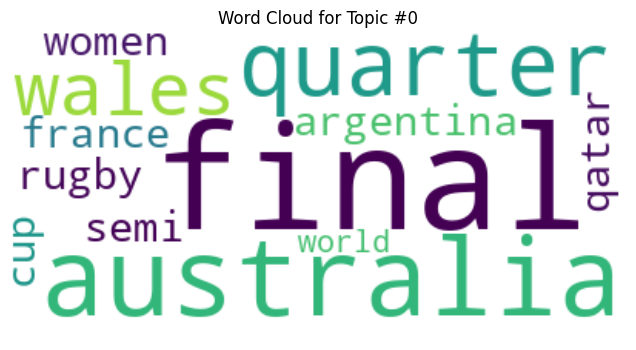

THE TOP 15 WORDS FOR TOPIC #1
['troop', 'force', 'military', 'attack', 'zelensky', 'city', 'president', 'kyiv', 'invasion', 'ukrainian', 'putin', 'russian', 'russia', 'war', 'ukraine']


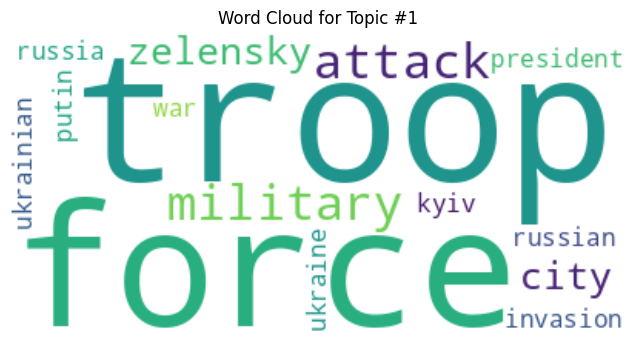

THE TOP 15 WORDS FOR TOPIC #2
['life', 'death', 'died', 'child', 'family', 'bbc', 'people', 'new', 'man', 'home', 'woman', 'old', 'police', 'year', 'say']


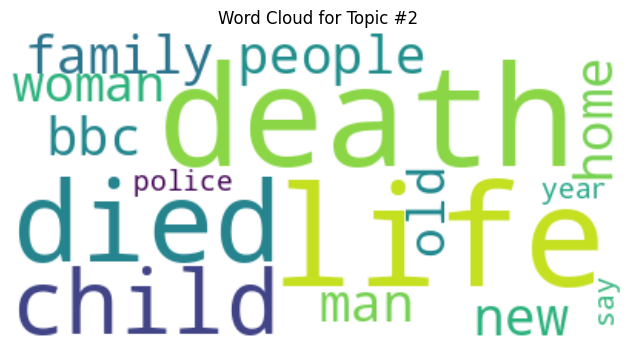

THE TOP 15 WORDS FOR TOPIC #3
['final', 'title', 'chelsea', 'goal', 'score', 'man', 'arsenal', 'win', 'liverpool', 'champions', 'united', 'premier', 'manchester', 'city', 'league']


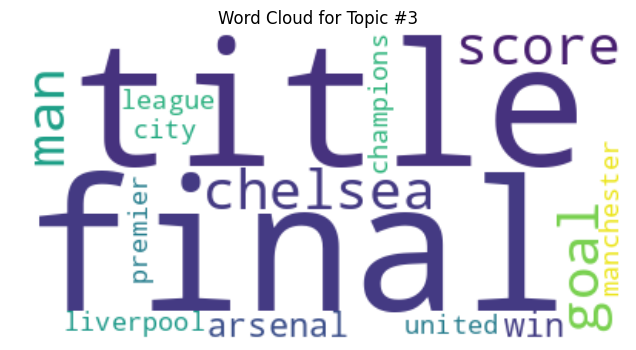

THE TOP 15 WORDS FOR TOPIC #4
['2023a', 'striking', 'taken', 'pictures', 'image', 'going', 'selection', 'paying', 'attention', 'closely', 'quiz', 'past', 'seven', 'days', 'week']


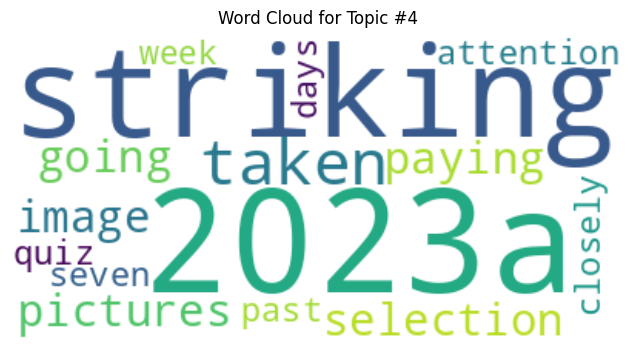

THE TOP 15 WORDS FOR TOPIC #5
['calculator', 'prices', 'help', 'household', 'rise', 'high', 'food', 'inflation', 'rising', 'energy', 'price', 'rate', 'living', 'uk', 'cost']


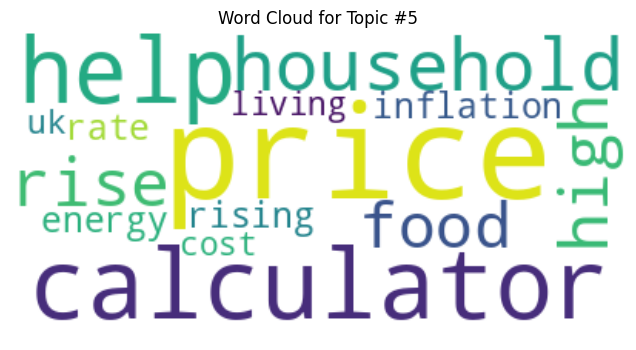

THE TOP 15 WORDS FOR TOPIC #6
['mps', 'leadership', 'party', 'new', 'papers', 'boris', 'liz', 'tory', 'johnson', 'pm', 'truss', 'prime', 'rishi', 'minister', 'sunak']


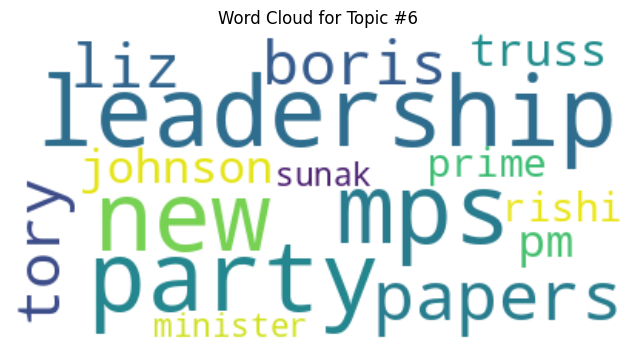

THE TOP 15 WORDS FOR TOPIC #7
['nations', 'africa', 'south', 'final', 'zealand', 'new', 'day', '2022', 'australia', 'ashes', 'women', 'win', 'euro', 'test', 'england']


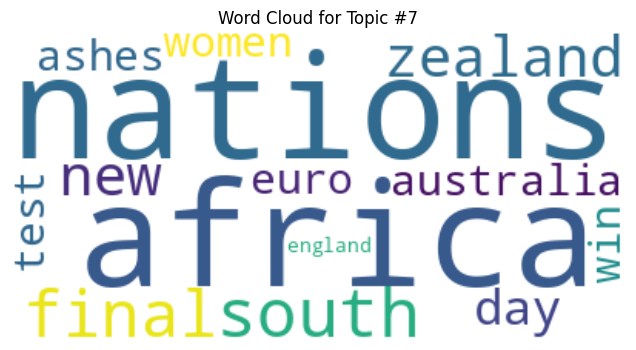

THE TOP 15 WORDS FOR TOPIC #8
['coronation', 'action', 'royal', 'elizabeth', 'union', 'strikes', 'worker', 'rail', 'charles', 'pay', 'train', 'day', 'king', 'queen', 'strike']


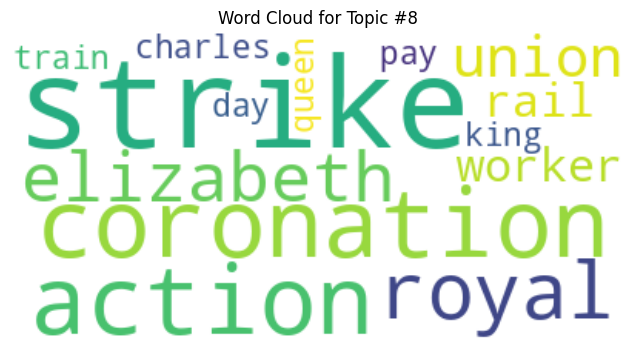

THE TOP 15 WORDS FOR TOPIC #9
['captive', 'children', 'elderly', 'palestinian', 'young', 'killed', 'hostages', 'taken', 'hostage', 'israeli', 'attack', 'people', 'hamas', 'israel', 'gaza']


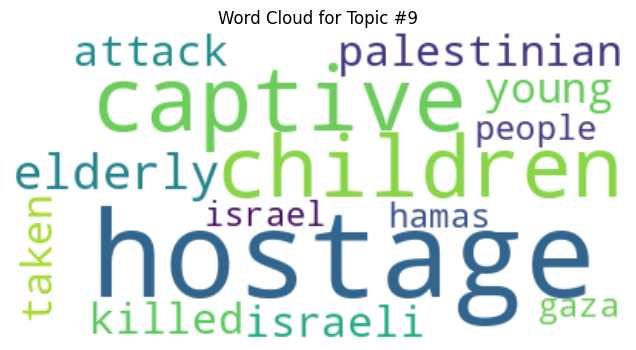

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for index, topic in enumerate(nmf_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    top_words_indices = topic.argsort()[-15:]
    top_words = [tfidf_vectorizer.get_feature_names_out()[i] for i in top_words_indices]
    print(top_words)
    wordcloud = WordCloud(width=400, height=200, background_color='white').generate(' '.join(top_words))
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Topic #{index}')
    plt.axis('off')
    plt.show()
